# This notebook provides code to run python scripts to do the follow:

### Creates .h5 files for for TIMIT and movie trailers -- stores correlation values and weights for each subject and each model type
 
### Uses the individual .h5 files for each subject and model type to plot these results. Code  generates figures for the manuscript (Desai & Hamilton, 2022)

A couple of things to reiterate from the repo README (more like potential FAQs): 

1) **How much RAM should my computer have in order to successfully fit these models?** 
I would highly highly recommend running this notebook on an external computer (if you have one) that has a fair bit of RAM (40GB minimum). Fitting these linear regression models while adding training data is extremely computational intensive because the size of the training data matrix will get larger and larger with each iteration of adding training data (sentences for TIMIT and chunks for movie trailers). 

2) **Can I use TACC to fit these models?** 
If you're wondering about running this code on TACC, I will say it's good for some of the models but not others. For examples, it's not a bad idea to run some of the speech features which have a single feature (so the acoustic envelope or pitch) for TIMIT. Approximately, fitting these models for the TIMIT stimulus using the envelope or pitch will take 24 hours (give or take). For movie trailers (using the pitch or envelope as the individual speech feature), running the code on TACC will take 3-4 days. If you want to try and fit a model using either the full_model or phonological features, I wouldn't even bother trying to do this for TIMIT or Movie Trailers on TACC, as this will take more than 5 days. 

3) **Do you recommend using this notebook or running this code in the command line or terminal (depending on OS)?**
Either is fine. The notebook is set up so that you can just run each cell individually, but of course jupyter notebook tends to be much slower compared to running code using terminal or the command line. If you wish to use terminal or the command line, simply copy the line of code to run the `run_timit` or `run_trailers` functions and the code will run and output to your specified path (`data_dir` specified below). 

4) **Where should I store all of the relevant files and data which get called in this code?** 
I would also recommend running this code locally as opposed to using any sort of cloud-based system online to store the data. For example, using Box (unless your data are stored offline) will be extremely slow and will slow down the processes. 

5) **Approximately how long did to fit all of these models for both TIMIT and Movie trailers** 
A VERY LONG TIME!! I'm not going to lie, for all 16 subjects for both movie trailers and TIMIT and for all individual and combined speech features... this took about 6-7 months. I also was running this code on multiple computers (including TACC). 

6) **Ugh! If I don't want to spend 6-7 months waiting for all of this code to run for all subjects can I just have the .h5 files you've already created?** 
Of course! The purpose of all of this code is to just show how I fit the models and created all of the .h5 files. To access these files, they are located here: [LINK]

In [1]:
from how_much_data_generation import *


/Users/maansidesai/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.1, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
/Users/maansidesai/.local/lib/python3.9/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
user = input('Enter user for computer:   ') #the username for your computer

data_dir=f'/Users/{user}/Desktop/data/'  #path - I keep the data locally

subject = input('Enter subject ID: ') #e.g. MT0003


Enter user for computer:   maansidesai
Enter subject ID: MT0002


### TIMIT 
Run function for TIMIT to generate an .h5 file for correlation values and weights from TRF (or mTRF if running the full model) for each repetition of adding more training set data (e.g. randomly add more sentences from the training set)

In [3]:
#the only acceptable model types are the following: pitch, envelope, phnfeat, full_model 

model_type = 'full_model' #change to another model type you want to run. 
corrs_reps, wts_rep = run_timit(subject, data_dir, model_type, stimulus_class = 'TIMIT') 



TIMIT
['fadg0_si1279.wav', 'faem0_si2022.wav', 'falr0_si1955.wav', 'fbcg1_si1612.wav', 'fbjl0_si2182.wav', 'fbmh0_si1766.wav', 'fbmj0_si815.wav', 'fcag0_si1503.wav', 'fcag0_si1641.wav', 'fcaj0_si1479.wav', 'fcaj0_si1804.wav', 'fceg0_si1878.wav', 'fceg0_si618.wav', 'fcft0_si1808.wav', 'fcft0_si548.wav', 'fcjs0_si1607.wav', 'fcmh0_si2084.wav', 'fcmh1_si1493.wav', 'fcmr0_si1735.wav', 'fcmr0_si475.wav', 'fcrh0_si1718.wav', 'fcrz0_si2053.wav', 'fdas1_si2091.wav', 'fdaw0_si1406.wav', 'fdfb0_si1948.wav', 'fdhc0_si2189.wav', 'fdjh0_si1565.wav', 'fdml0_si2075.wav', 'fdms0_si1218.wav', 'fdrd1_si1544.wav', 'fdrw0_si1423.wav', 'fdxw0_si1511.wav', 'fdxw0_si2141.wav', 'feac0_si1245.wav', 'fear0_si1882.wav', 'fedw0_si1653.wav', 'fetb0_si1148.wav', 'fgcs0_si856.wav', 'fgjd0_si1179.wav', 'fgmd0_si2107.wav', 'fgrw0_si1990.wav', 'fhlm0_si1560.wav', 'fisb0_si2209.wav', 'fjas0_si2030.wav', 'fjhk0_si1652.wav', 'fjkl0_si1562.wav', 'fjkl0_si2192.wav', 'fjlg0_si1506.wav', 'fjlg0_si2306.wav', 'fjlr0_si1861.wav'

(11, 64, 206)
fdhc0_si2189.wav
phnfeatmat shape is:
(14, 289)
envs shape is:
(289, 1)
pitch_mat shape is:
(1, 289)
(1, 64, 289)
fdjh0_si1565.wav
phnfeatmat shape is:
(14, 313)
envs shape is:
(313, 1)
pitch_mat shape is:
(1, 313)
(1, 64, 313)
fdml0_si2075.wav
phnfeatmat shape is:
(14, 206)
envs shape is:
(206, 1)
pitch_mat shape is:
(1, 206)
(1, 64, 206)
fdms0_si1218.wav
phnfeatmat shape is:
(14, 331)
envs shape is:
(331, 1)
pitch_mat shape is:
(1, 331)
(1, 64, 331)
fdrd1_si1544.wav
phnfeatmat shape is:
(14, 332)
envs shape is:
(332, 1)
pitch_mat shape is:
(1, 332)
(1, 64, 332)
fdrw0_si1423.wav
phnfeatmat shape is:
(14, 308)
envs shape is:
(308, 1)
pitch_mat shape is:
(1, 308)
(1, 64, 308)
fdxw0_si1511.wav
phnfeatmat shape is:
(14, 262)
envs shape is:
(262, 1)
pitch_mat shape is:
(1, 262)
(1, 64, 262)
fdxw0_si2141.wav
phnfeatmat shape is:
(14, 177)
envs shape is:
(177, 1)
pitch_mat shape is:
(1, 177)
(10, 64, 177)
feac0_si1245.wav
phnfeatmat shape is:
(14, 304)
envs shape is:
(304, 1)
p

(2, 64, 242)
mabc0_si1620.wav
phnfeatmat shape is:
(14, 180)
envs shape is:
(180, 1)
pitch_mat shape is:
(1, 180)
(2, 64, 180)
mabw0_si1664.wav
phnfeatmat shape is:
(14, 250)
envs shape is:
(250, 1)
pitch_mat shape is:
(1, 250)
(1, 64, 250)
mabw0_si2294.wav
phnfeatmat shape is:
(14, 301)
envs shape is:
(301, 1)
pitch_mat shape is:
(1, 301)
(1, 64, 301)
madd0_si1295.wav
phnfeatmat shape is:
(14, 238)
envs shape is:
(238, 1)
pitch_mat shape is:
(1, 238)
(1, 64, 238)
maeb0_si2250.wav
phnfeatmat shape is:
(14, 327)
envs shape is:
(327, 1)
pitch_mat shape is:
(1, 327)
(2, 64, 327)
maeo0_si1956.wav
phnfeatmat shape is:
(14, 315)
envs shape is:
(315, 1)
pitch_mat shape is:
(1, 315)
(1, 64, 315)
mafm0_si2199.wav
phnfeatmat shape is:
(14, 143)
envs shape is:
(143, 1)
pitch_mat shape is:
(1, 143)
(2, 64, 143)
majc0_si2095.wav
phnfeatmat shape is:
(14, 318)
envs shape is:
(318, 1)
pitch_mat shape is:
(1, 318)
(1, 64, 318)
makr0_si1352.wav
phnfeatmat shape is:
(14, 278)
envs shape is:
(278, 1)
pit

phnfeatmat shape is:
(14, 320)
envs shape is:
(320, 1)
pitch_mat shape is:
(1, 320)
(2, 64, 320)
medr0_si1374.wav
phnfeatmat shape is:
(14, 291)
envs shape is:
(291, 1)
pitch_mat shape is:
(1, 291)
(1, 64, 291)
megj0_si1967.wav
phnfeatmat shape is:
(14, 174)
envs shape is:
(174, 1)
pitch_mat shape is:
(1, 174)
(2, 64, 174)
mejl0_si1592.wav
phnfeatmat shape is:
(14, 321)
envs shape is:
(321, 1)
pitch_mat shape is:
(1, 321)
(2, 64, 321)
mers0_si1649.wav
phnfeatmat shape is:
(14, 214)
envs shape is:
(214, 1)
pitch_mat shape is:
(1, 214)
(1, 64, 214)
mesg0_si1962.wav
phnfeatmat shape is:
(14, 250)
envs shape is:
(250, 1)
pitch_mat shape is:
(1, 250)
(1, 64, 250)
mesj0_si2257.wav
phnfeatmat shape is:
(14, 291)
envs shape is:
(291, 1)
pitch_mat shape is:
(1, 291)
(1, 64, 291)
mewm0_si1348.wav
phnfeatmat shape is:
(14, 298)
envs shape is:
(298, 1)
pitch_mat shape is:
(1, 298)
(1, 64, 298)
mfer0_si2122.wav
phnfeatmat shape is:
(14, 172)
envs shape is:
(172, 1)
pitch_mat shape is:
(1, 172)
(1, 

phnfeatmat shape is:
(14, 288)
envs shape is:
(288, 1)
pitch_mat shape is:
(1, 288)
(2, 64, 288)
mmab1_si1494.wav
phnfeatmat shape is:
(14, 198)
envs shape is:
(198, 1)
pitch_mat shape is:
(1, 198)
(2, 64, 198)
mmab1_si2124.wav
phnfeatmat shape is:
(14, 313)
envs shape is:
(313, 1)
pitch_mat shape is:
(1, 313)
(1, 64, 313)
mmam0_si1668.wav
phnfeatmat shape is:
(14, 285)
envs shape is:
(285, 1)
pitch_mat shape is:
(1, 285)
(1, 64, 285)
mmam0_si2227.wav
phnfeatmat shape is:
(14, 247)
envs shape is:
(247, 1)
pitch_mat shape is:
(1, 247)
(1, 64, 247)
mmbs0_si1781.wav
phnfeatmat shape is:
(14, 261)
envs shape is:
(261, 1)
pitch_mat shape is:
(1, 261)
(2, 64, 261)
mmdb0_si1617.wav
phnfeatmat shape is:
(14, 206)
envs shape is:
(206, 1)
pitch_mat shape is:
(1, 206)
(1, 64, 206)
mmdg0_si2035.wav
phnfeatmat shape is:
(14, 269)
envs shape is:
(269, 1)
pitch_mat shape is:
(1, 269)
(1, 64, 269)
mmdm0_si681.wav
phnfeatmat shape is:
(14, 321)
envs shape is:
(321, 1)
pitch_mat shape is:
(1, 321)
(1, 6

(1, 64, 227)
mtat1_si1627.wav
phnfeatmat shape is:
(14, 264)
envs shape is:
(264, 1)
pitch_mat shape is:
(1, 264)
(1, 64, 264)
mtdb0_si2031.wav
phnfeatmat shape is:
(14, 233)
envs shape is:
(233, 1)
pitch_mat shape is:
(1, 233)
(1, 64, 233)
mtdp0_si1274.wav
phnfeatmat shape is:
(14, 226)
envs shape is:
(226, 1)
pitch_mat shape is:
(1, 226)
(1, 64, 226)
mtdt0_si2254.wav
phnfeatmat shape is:
(14, 279)
envs shape is:
(279, 1)
pitch_mat shape is:
(1, 279)
(2, 64, 279)
mtjg0_si2157.wav
phnfeatmat shape is:
(14, 176)
envs shape is:
(176, 1)
pitch_mat shape is:
(1, 176)
(1, 64, 176)
mtjs0_si1192.wav
phnfeatmat shape is:
(14, 304)
envs shape is:
(304, 1)
pitch_mat shape is:
(1, 304)
(1, 64, 304)
mtju0_si2269.wav
phnfeatmat shape is:
(14, 195)
envs shape is:
(195, 1)
pitch_mat shape is:
(1, 195)
(1, 64, 195)
mtls0_si740.wav
phnfeatmat shape is:
(14, 281)
envs shape is:
(281, 1)
pitch_mat shape is:
(1, 281)
(1, 64, 281)
mtpg0_si2013.wav
phnfeatmat shape is:
(14, 256)
envs shape is:
(256, 1)
pitc

370
Total number of validation sentences:
10
Training indices:
[  0   1   2   3   4   5   6   7   8  11  12  13  14  15  16  17  18  19
  20  21  22  23  25  26  27  28  29  30  31  33  34  35  36  37  38  39
  40  41  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58
  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76
  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94
  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 118 119 120 121 122 123 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 163 164 165 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187
 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205
 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 222 223 224
 225 226 227 228 229 230 231 232 233 234 235 236 237 239 240 

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/maansidesai/Desktop/data//participants/MT0002/MT0002_STRF_by_pitchenvsphnfeat_TIMIT.hf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

### Movie Trailers
Run function for Movie Trailers to generate an .h5 file for correlation values and weights from TRF (or mTRF if running the full model) for each repetition of adding more training set data (e.g. randomly add 2 second long chunks of movie trailer data )

In [4]:
model_type = 'envelope' #change to another model type you want to run.
corrs_reps, wts_rep = run_trailers(subject, data_dir, model_type, stimulus_class = 'MovieTrailers', rep_num=10) #see function documentation for these inputs 

MovieTrailers
['angrybirds-tlr1_a720p.wav', 'bighero6-tlr1_a720p.wav', 'bighero6-tlr2_a720p.wav', 'bighero6-tlr3_a720p.wav', 'cars-3-trailer-4_a720p.wav', 'coco-trailer-1_a720p.wav', 'deep-trailer-1_a720p.wav', 'ferdinand-trailer-2_a720p.wav', 'ferdinand-trailer-3_a720p.wav', 'ice-dragon-trailer-1_a720p.wav', 'incredibles-2-trailer-1_a720p.wav', 'incredibles-2-trailer-2_a720p.wav', 'insideout-tlr2zzyy32_a720p.wav', 'insideout-usca-tlr2_a720p.wav', 'moana-clip-youre-welcome_a720p.wav', 'paddington-2-trailer-1_a720p.wav', 'pandas-trailer-2_a720p.wav', 'pele-tlr1_a720p.wav', 'the-breadwinner-trailer-1_a720p.wav', 'the-lego-ninjago-movie-trailer-1_a720p.wav', 'the-lego-ninjago-movie-trailer-2_a720p.wav', 'thelittleprince-tlr_a720p.wav', 'trolls-tlr1_a720p.wav']
angrybirds-tlr1_a720p.wav
envs shape is:
(19263, 1)
(1, 64, 19263)
bighero6-tlr1_a720p.wav
envs shape is:
(12939, 1)
(1, 64, 12939)
bighero6-tlr2_a720p.wav
envs shape is:
(17451, 1)
(1, 64, 17451)
bighero6-tlr3_a720p.wav
envs shape 

INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.16820, max corr=0.10145, over-under(0.05)=-52
INFO:counter:1/10 items complete (40.63 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.05018, max corr=0.23881, over-under(0.05)=-11
INFO:counter:2/10 items complete (46.89 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.09558, max corr=0.35991, over-under(0.05)=31
INFO:counter:3/10 items complete (51.80 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.11699, max corr=0.55888, over-under(0.05)=2

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.23653, max corr=0.40353, over-under(0.05)=60
INFO:counter:1/10 items complete (117.92 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.07208, max corr=0.26076, over-under(0.05)=29
INFO:counter:2/10 items complete (111.66 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.09426, max corr=0.06725, over-under(0.05)=-25
INFO:counter:3/10 items complete (86.04 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.15609, max corr=0.40467, over-under(0.05)=3

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.02696, max corr=0.44027, over-under(0.05)=5
INFO:counter:1/10 items complete (46.47 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.06866, max corr=0.24812, over-under(0.05)=28
INFO:counter:2/10 items complete (62.34 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.07061, max corr=0.21926, over-under(0.05)=-25
INFO:counter:3/10 items complete (62.87 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.07871, max corr=0.06130, over-under(0.05)=-40

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.08467, max corr=0.30228, over-under(0.05)=35
INFO:counter:1/10 items complete (99.96 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.10108, max corr=0.09375, over-under(0.05)=-29
INFO:counter:2/10 items complete (71.81 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.08098, max corr=0.33563, over-under(0.05)=29
INFO:counter:3/10 items complete (75.51 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.08098, max corr=0.33563, over-under(0.05)=29


**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.10437, max corr=0.08756, over-under(0.05)=-35
INFO:counter:1/10 items complete (105.51 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.03745, max corr=0.24871, over-under(0.05)=20
INFO:counter:2/10 items complete (66.40 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.04104, max corr=0.14983, over-under(0.05)=-15
INFO:counter:3/10 items complete (73.65 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.03745, max corr=0.24871, over-under(0.05)=

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.01891, max corr=0.21611, over-under(0.05)=1
INFO:counter:1/10 items complete (89.97 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.06274, max corr=0.33846, over-under(0.05)=29
INFO:counter:2/10 items complete (93.26 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.00557, max corr=0.31814, over-under(0.05)=-9
INFO:counter:3/10 items complete (95.42 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.03283, max corr=0.19876, over-under(0.05)=-20


**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.14437, max corr=0.15837, over-under(0.05)=-52
INFO:counter:1/10 items complete (96.14 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.13832, max corr=0.43044, over-under(0.05)=23
INFO:counter:2/10 items complete (98.59 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.01739, max corr=0.22546, over-under(0.05)=11
INFO:counter:3/10 items complete (81.48 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.14437, max corr=0.15837, over-under(0.05)=-5

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.00757, max corr=0.36879, over-under(0.05)=-7
INFO:counter:1/10 items complete (88.03 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.16236, max corr=0.12617, over-under(0.05)=-39
INFO:counter:2/10 items complete (65.78 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.04079, max corr=0.17789, over-under(0.05)=-20
INFO:counter:3/10 items complete (74.15 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.08777, max corr=0.22235, over-under(0.05)

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.19613, max corr=0.54908, over-under(0.05)=38
INFO:counter:1/10 items complete (84.50 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.19613, max corr=0.54908, over-under(0.05)=38
INFO:counter:2/10 items complete (98.96 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.02669, max corr=0.30112, over-under(0.05)=-13
INFO:counter:3/10 items complete (79.88 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.11487, max corr=0.37353, over-under(0.05)=38


**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.05008, max corr=0.12279, over-under(0.05)=-21
INFO:counter:1/10 items complete (63.79 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.01158, max corr=0.22984, over-under(0.05)=8
INFO:counter:2/10 items complete (72.66 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=-0.20478, max corr=0.05676, over-under(0.05)=-53
INFO:counter:3/10 items complete (78.21 items/second, 00:00:00 remaining)
INFO:ridge_corr:Selecting held-out test set..
INFO:ridge_corr:Doing Eigenvalue decomposition...
INFO:ridge_corr:Training: alpha=100.000, mean corr=0.09745, max corr=0.34785, over-under(0.05)=23

**********************************
**********************************
The length of the number of training set stimuli is: 10
(2560, 103)
(2560, 64)
(34791, 103)
(34791, 64)
**************************
309
Cmode = False
Number of time points is greater than the number of features
stim shape (not cmode): 
(2560, 103)
Covmat shape: 
(103, 103)
(103, 103) (103, 2560) (2560, 64)


FileNotFoundError: [Errno 2] Unable to create file (unable to open file: name = '/Users/maansidesai/Desktop/data//envelope/MT0002_MovieTrailers_corrs_reps_trainingData.hf5', errno = 2, error message = 'No such file or directory', flags = 15, o_flags = a02)

## Audiobooks

In [ ]:
from audiobooks_how_much_training_data import * 


### Code below for plotting and re-creating figures from the manuscript

In [5]:
from training_plotting_funcs import *
#%matplotlib notebook

In [6]:
user = input('Enter computer username: ') 
#stimulus_class = input('Enter stimulus class (TIMIT or MovieTrailers): ')
#datapath = '/Users/%s/Box/timit_mt_how_much_data' %(user)

datapath = '/Users/%s/Desktop/data' %(user)
subject_list = ['MT0001','MT0002', 'MT0003', 'MT0004', 'MT0005', 'MT0006', 'MT0008','MT0009', 'MT0010', 'MT0011', 'MT0012', 
'MT0013','MT0014', 'MT0015', 'MT0016', 'MT0017']
print(datapath)


/Users/maansidesai/Desktop/data


## Figure 1 - Individual and average correlation values with increasing amounts of training data

In [ ]:
#Figure 1A - TIMIT
model_type = 'auditory_training_data'
stimulus_class = 'TIMIT'
kneepoint_avg, kneepoint_se, reps_list, grand_corr_avg, grand_corr_std = training_plot_corrs(subject_list, datapath, model_type, stimulus_class, chans_64=True, save_fig=True)

In [ ]:
#Figure 1A - weights for TIMIT for best subject (MT0008)
plot_weight_times(datapath, stimulus_class, subject='MT0008', save_fig=True)


In [ ]:
#Figure 1B - Movie Trailers
model_type = 'auditory_training_data'
stimulus_class = 'MovieTrailers'
kneepoint_avg, kneepoint_se, reps_list, grand_corr_avg, grand_corr_std = training_plot_corrs(subject_list, datapath, model_type, stimulus_class)

In [ ]:
#Figure 1B - weights for Movie Trailers for best subject (MT0008)
plot_weight_times(datapath, stimulus_class, subject='MT0008', save_fig=True)

## Figure 2 - Averaging increasing correlation value based on acoustic or linguistic feature

In [ ]:
# Figure 2A
#run function for individual models - TIMIT. 

stimulus_class = 'TIMIT'
pitch_kneepoint_avg, pitch_kneepoint_se, pitch_reps_list, pitch_grand_corr_avg, pitch_grand_corr_std = training_plot_corrs(subject_list, datapath, 'pitch', stimulus_class)
envs_kneepoint_avg, envs_kneepoint_se, envs_reps_list, envs_grand_corr_avg, envs_grand_corr_std = training_plot_corrs(subject_list, datapath, 'envelope', stimulus_class)
phnfeat_kneepoint_avg, phnfeat_kneepoint_se, phnfeat_reps_list, phnfeat_grand_corr_avg, phnfeat_grand_corr_std = training_plot_corrs(subject_list, datapath, 'phnfeat', stimulus_class)


plt.figure()
#plot phnfeat
plt.fill_between(phnfeat_reps_list, phnfeat_grand_corr_avg+phnfeat_grand_corr_std, phnfeat_grand_corr_avg-phnfeat_grand_corr_std, alpha=0.6, color='red')
plt.vlines(np.mean(phnfeat_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.axvspan(phnfeat_kneepoint_avg-phnfeat_kneepoint_se, phnfeat_kneepoint_avg + phnfeat_kneepoint_se, alpha=0.5, color='red')

#plot pitch
plt.fill_between(pitch_reps_list, pitch_grand_corr_avg+pitch_grand_corr_std, pitch_grand_corr_avg-pitch_grand_corr_std, alpha=0.6, color='blue')
plt.vlines(np.mean(pitch_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='blue')
plt.axvspan(pitch_kneepoint_avg-pitch_kneepoint_se, pitch_kneepoint_avg + pitch_kneepoint_se, alpha=0.5, color='blue')

#plot envs
plt.fill_between(envs_reps_list, envs_grand_corr_avg+envs_grand_corr_std, envs_grand_corr_avg-envs_grand_corr_std, alpha=0.6, color='gray')
plt.vlines(np.mean(envs_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='gray')
plt.axvspan(envs_kneepoint_avg-envs_kneepoint_se, envs_kneepoint_avg + envs_kneepoint_se, alpha=0.5, color='gray')


In [ ]:
# Figure 2B
#run function for individual models - Movie Trailers. 

stimulus_class = 'MovieTrailers'
pitch_kneepoint_avg, pitch_kneepoint_se, pitch_reps_list, pitch_grand_corr_avg, pitch_grand_corr_std = training_plot_corrs(subject_list, datapath, 'pitch', stimulus_class)
envs_kneepoint_avg, envs_kneepoint_se, envs_reps_list, envs_grand_corr_avg, envs_grand_corr_std = training_plot_corrs(subject_list, datapath, 'envelope', stimulus_class)
phnfeat_kneepoint_avg, phnfeat_kneepoint_se, phnfeat_reps_list, phnfeat_grand_corr_avg, phnfeat_grand_corr_std = training_plot_corrs(subject_list, datapath, 'phnfeat', stimulus_class)


plt.figure()
#plot phnfeat
plt.fill_between(phnfeat_reps_list, phnfeat_grand_corr_avg+phnfeat_grand_corr_std, phnfeat_grand_corr_avg-phnfeat_grand_corr_std, alpha=0.6, color='red')
plt.vlines(np.mean(phnfeat_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='red')
plt.axvspan(phnfeat_kneepoint_avg-phnfeat_kneepoint_se, phnfeat_kneepoint_avg + phnfeat_kneepoint_se, alpha=0.5, color='red')

#plot pitch
plt.fill_between(pitch_reps_list, pitch_grand_corr_avg+pitch_grand_corr_std, pitch_grand_corr_avg-pitch_grand_corr_std, alpha=0.6, color='blue')
plt.vlines(np.mean(pitch_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='blue')
plt.axvspan(pitch_kneepoint_avg-pitch_kneepoint_se, pitch_kneepoint_avg + pitch_kneepoint_se, alpha=0.5, color='blue')

#plot envs
plt.fill_between(envs_reps_list, envs_grand_corr_avg+envs_grand_corr_std, envs_grand_corr_avg-envs_grand_corr_std, alpha=0.6, color='gray')
plt.vlines(np.mean(envs_kneepoint_avg), plt.ylim()[0], plt.ylim()[1], linestyles='dashed', color='gray')
plt.axvspan(envs_kneepoint_avg-envs_kneepoint_se, envs_kneepoint_avg + envs_kneepoint_se, alpha=0.5, color='gray')


## Figure 3 - Weight stabilization for three subjects with varying model performance using TIMIT

#Running these functions outputs a PDF file of the weights for each repetition. Figures 3 and 4 were created by identifying the first repetition, kneepoint, and final repetition. First and final repetitions are self-expanatory. 
Kneepoint can be identified by running the next cell:

In [ ]:
model_type = 'auditory_training_data'
stimulus_class = 'TIMIT'
kneepoint_MT0008 = subj_kneepoint(['MT0008'], datapath, model_type, stimulus_class)
print(kneepoint_MT0008)
kneepoint_MT0016 = subj_kneepoint(['MT0016'], datapath, model_type, stimulus_class)
print(kneepoint_MT0008)
kneepoint_MT0017 = subj_kneepoint(['MT0017'], datapath, model_type, stimulus_class)
print(kneepoint_MT0017)


In [ ]:
#Best subject: MT0008
#Average subject: MT0016
#Worst subject: MT0017
stimulus_class = 'TIMIT'
plot_weight_times(datapath, stimulus_class, subject='MT0008', save_fig=True) #Figure 3A
plot_weight_times(datapath, stimulus_class, subject='MT0016', save_fig=True) #Figure 3C
plot_weight_times(datapath, stimulus_class, subject='MT0017', save_fig=True) #Figure 3E



In [ ]:
stimulus_class = 'MovieTrailers'
plot_weight_times(datapath, stimulus_class, subject='MT0008', save_fig=True) #Figure 3A

In [ ]:
#Make weight stabilization plots for each of the subjects
stimulus_class = 'TIMIT'
model_type = 'auditory_training_data'
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0008', save_fig=True) ##Figure 3B
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0016', save_fig=True) ##Figure 3D
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0017', save_fig=True) ##Figure 3F

## Figure 4 - Weight stabilization for three subjects with varying model performance using Movie Trailers

In [ ]:

model_type = 'auditory_training_data'
stimulus_class = 'MovieTrailers'
kneepoint_MT0008 = subj_kneepoint(['MT0008'], datapath, model_type, stimulus_class)
print(kneepoint_MT0008)
kneepoint_MT0016 = subj_kneepoint(['MT0016'], datapath, model_type, stimulus_class)
print(kneepoint_MT0008)
kneepoint_MT0017 = subj_kneepoint(['MT0017'], datapath, model_type, stimulus_class)
print(kneepoint_MT0017)


In [ ]:
#Best subject: MT0008
#Average subject: MT0016
#Worst subject: MT0017
stimulus_class = 'MovieTrailers'
plot_weight_times(datapath, stimulus_class, subject='MT0008', save_fig=True) #Figure 4A
plot_weight_times(datapath, stimulus_class, subject='MT0016', save_fig=True) #Figure 4C
plot_weight_times(datapath, stimulus_class, subject='MT0017', save_fig=True) #Figure 4E



In [ ]:
#Make weight stabilization plots for each of the subjects
stimulus_class = 'MovieTrailers'
model_type = 'auditory_training_data'
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0008', save_fig=True) ##Figure 4B
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0016', save_fig=True) ##Figure 4D
plt.figure()
wts_stabilization(datapath, stimulus_class,  model_type, 'MT0017', save_fig=True) ##Figure 4F

## Statistics: linear mixed effects model


In [4]:
#output a csv file used to fit LME model in the other notebook
lmem_csv(user, datapath, subject_list)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/maansidesai/Desktop/data/TIMIT/auditory_training_data/MT0001_TIMIT_corrs_reps_trainingData.hf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Videos of single subject correlation and weights plotted at the same time

In [25]:
from matplotlib.animation import FuncAnimation
from ipywidgets import Video
stimulus_class = 'MovieTrailers'

x,y = individual_subj_corrs(datapath, 'auditory_training_data', stimulus_class, subject_list=['MT0008'])

<IPython.core.display.Javascript object>


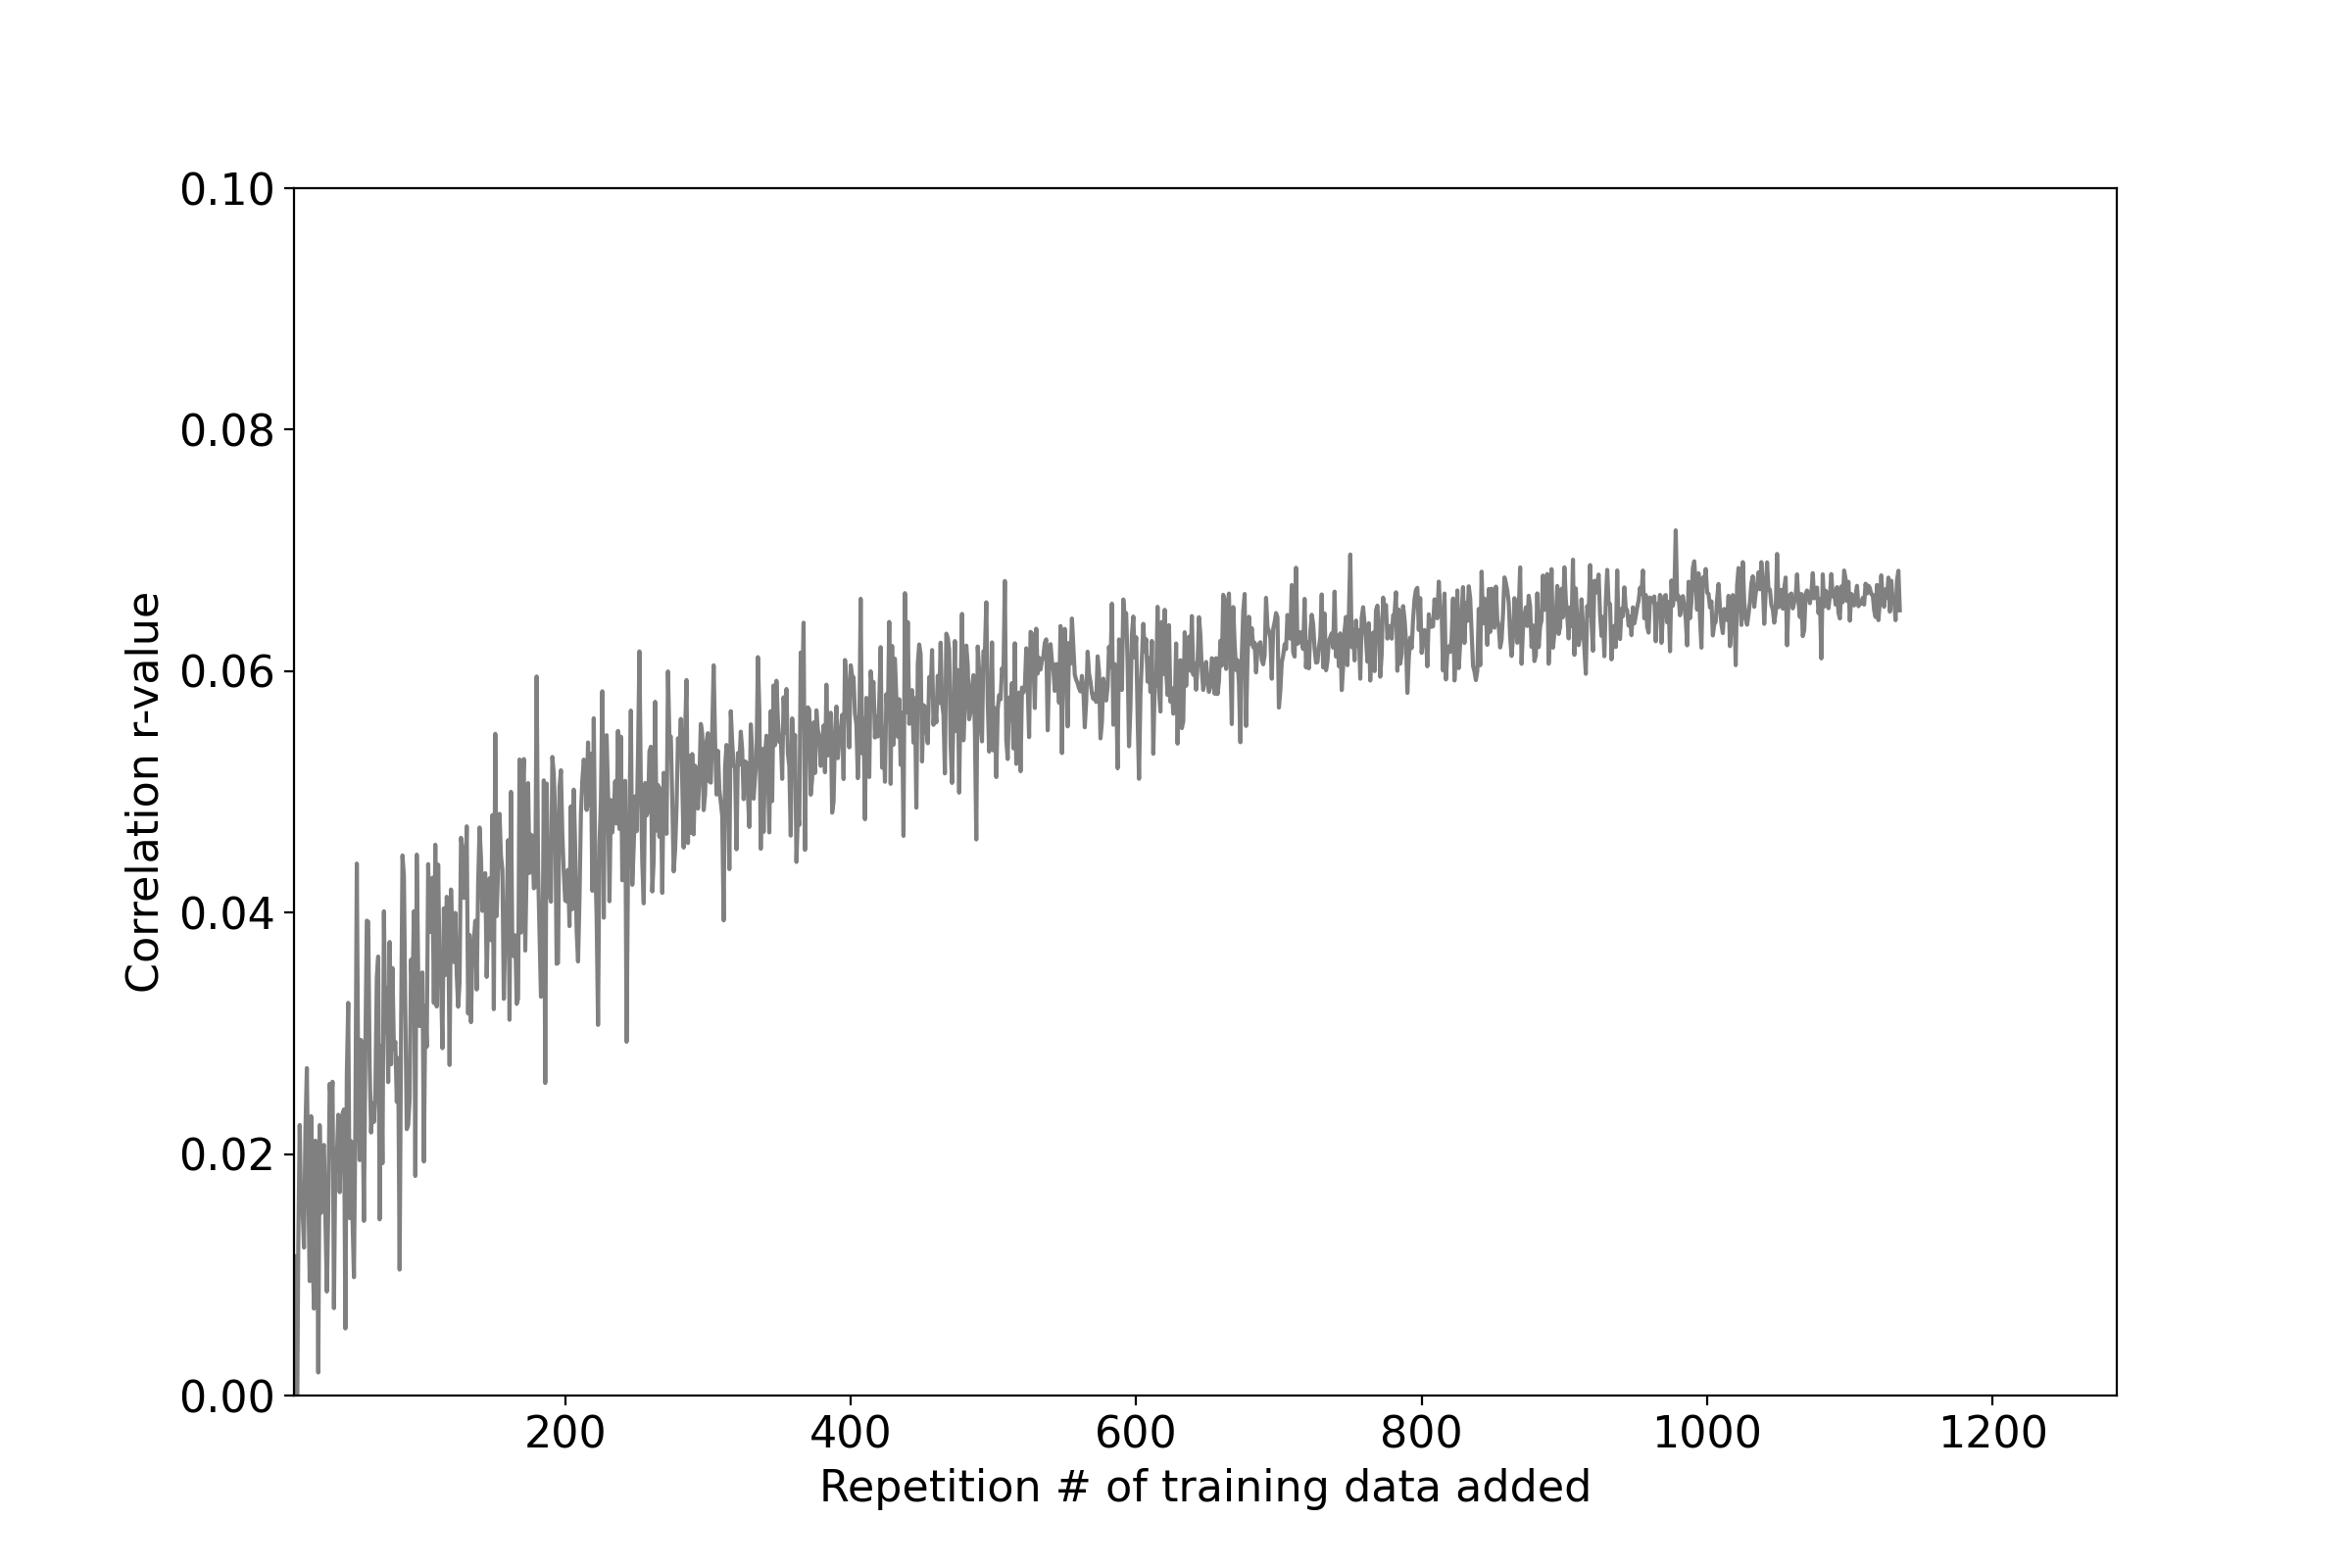

In [26]:
# x = range(100)
# y = np.random.rand(100)
%matplotlib notebook

frame_path = f'/Users/maansidesai/Desktop/data/figures/MT0008_{stimulus_class}_wts/'
fig, ax = plt.subplots(figsize=(12,8))
ax.set_xlim(10, np.max(np.max(x)+1))
ax.set_ylim(0, round(np.max(y), 1))
ax.set_xlabel('Repetition # of training data added', fontsize=16)
ax.set_ylabel('Correlation r-value', fontsize=16)
ax.tick_params(labelsize=16)

graph, = plt.plot([], [], '-', color='#808080')

def init():
    return graph,

def animate(i):
    graph.set_data(x[:i],y[:i])
    fig.savefig(f'{datapath}/figures/MT0008_gif_MT/{stimulus_class}_{i}.png')
    return graph,

ani = FuncAnimation(fig, animate, frames=range(len(x)), interval=2, save_count=len(x),
                    init_func=init, blit=True)

plt.show()
#ani.save(f'{datapath}/figures/MT0008_gif_TIMIT/MT0008_corrs-ani_{stimulus_class}.gif', writer='PillowWriter')



## Supplementary Figure 1

In [27]:
import numpy as np
import textgrid
import glob
from matplotlib import pyplot as plt
from matplotlib import cm, rcParams, colors
import scipy.stats
from string import digits
import h5py
from scipy import signal
from scipy.io import wavfile
import scipy.io
import pandas as pd
import seaborn as sns 
import random

%matplotlib inline

In [28]:
user = 'maansidesai'
wav_path =  f'/Users/{user}/Desktop/Stimuli/MovieTrailers'

# Load the text grid data from praat
#data_dir = '/Volumes/research_projects/Hamilton/summer_interns/stimuli/trailers/textgrids/Corrected'
user = 'maansidesai'
data_dir = f'/Users/{user}/Desktop/data'
#basename = glob.glob('%s/*_corrected.TextGrid'%(tg_path))
save_figs = f'/Users/{user}/Box/Desai_Conference_and_Journal_Submissions/Paper-how_much_data_do_you_need/Figures'

In [ ]:
#path to .wav files for movie trailers 

duration_dict = {}
for i in glob.glob(f'{wav_path}/*.wav'):
    fs, data = wavfile.read(i)
    name = i.replace(wav_path+'/', "")
    name = name.replace('_a720p.wav', "")
    duration_dict[name] = len(data)/fs
    

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(duration_dict.values(), color='red')
plt.gca().set_xticks(np.arange(len(duration_dict)))
plt.gca().set_xticklabels(duration_dict.keys(), rotation=90)
plt.ylabel('Trailer duration (s)')
plt.title('A: Supplementary Figure 1')
plt.savefig(f'{save_figs}/trailer_durations.pdf')

## Supplementary Figure 1B

In [ ]:
phn_hist_dict = {}

f = h5py.File(f'{data_dir}/fullEEGmatrix.hf5', 'r')
for i in list(f['MovieTrailers']):
    phnfeats = f[f'MovieTrailers/{i}/stim/phn_feat_timings'][:]
    phn_count = []
    #name = i.replace('_a720.wav', "")
    for j in np.arange(phnfeats.shape[0]):
        #print(len(np.where(phnfeats[j] == 1)[0]))
        
        x = len(np.where(phnfeats[j] == 1)[0])
        phn_count.append(x)
    phn_hist_dict[i[:-10]] = phn_count
    


In [ ]:
df = pd.DataFrame(data=phn_hist_dict)
plt.figure(figsize=(12,8))
y_axis_labels = ['sonorant','obstruent','voiced','back','front','low','high','dorsal',
                 'coronal','labial','syllabic','plosive','fricative','nasal']
sns.heatmap(df,annot=True, fmt='g', yticklabels=y_axis_labels, cmap=cm.Reds)
plt.savefig(f'{save_figs}/heatmap_phnfeat.pdf')

## Supplementary Figure 1C

In [ ]:
binned_pitch_dict = {}
#edges = []
for i in list(f['MovieTrailers']):
    a = f[f'MovieTrailers/{i}/stim/pitches'][:]
    bins=10
    percent=95
    assert percent > 1 
    assert percent < 100
    tail_percentage = (100 - percent)/2
    a_range = np.percentile(a, [tail_percentage, 100-tail_percentage])
    counts, bin_edges = np.histogram(a, bins=bins, range=a_range)
    binned_pitch_dict[i[:-10]] = counts[-9:]
    #edges.append(bin_edges[-9:])

In [ ]:
df = pd.DataFrame(data=binned_pitch_dict)
plt.figure(figsize=(13,9))
y_axis_labels = ['25-50Hz','56-85Hz','86-115Hz','116-145Hz','146-175Hz','176-205Hz','206-235Hz',
                 '236-265Hz','266-295Hz']
sns.heatmap(df,annot=True, fmt='g', yticklabels=y_axis_labels, cmap=cm.Reds)
plt.savefig(f'{save_figs}/heatmap_binned_pitch.pdf')

## Supplementary Figure 1D

In [ ]:
# matrix = np.zeros((23, 129, 129))
#trailer_wavs = f'/Users/{user}/Box/Stimuli/MovieTrailers'
trailer_wavs = f'/Users/{user}/Desktop/Stimuli/MovieTrailers'
plt.figure(figsize=(13,9))

#col = (np.random.random(), np.random.random(), np.random.random())
frequencies = []
power_spec = []
trailer_name = []
for idx, i in enumerate(glob.glob(f'{trailer_wavs}/*.wav')):
    samplerate, sig = wavfile.read(i)
    freqs, psd = signal.welch(sig)
   # matrix[:,0] = freqs
    frequencies.append(freqs*16000)
    power_spec.append(psd)
    trailer_name.append(i.replace(f'{trailer_wavs}/', "").replace('.wav', ""))

index = [0, 16, 32, 64, 128 ]
audio_fs = (freqs*16000)
x_labels = audio_fs[index] 

stacked_psd = np.dstack((frequencies, power_spec))
im = plt.imshow(stacked_psd[:,:].mean(2), aspect='auto', interpolation='nearest', cmap=cm.Reds, norm=colors.LogNorm())
plt.colorbar(im)
plt.gca().set_yticks(np.arange(len(trailer_name)))
plt.gca().set_yticklabels(trailer_name)
plt.xticks(index)

plt.gca().set_xticklabels(np.round(x_labels))
plt.xlabel('Frequency (Hz)')

plt.savefig(f'{save_figs}/heatmap_powerSpec.pdf')

## Supplementary Figure 2A

In [ ]:
datapath = f'/Users/{user}/Desktop/NaturalSpeech/'
aud_subject_list = os.listdir(f'{datapath}/EEG')
aud_subject_list = [sub for sub in subject_list if 'Subject' in sub and int(re.search(r'\d+', sub).group())]
aud_subject_list.sort()
print(aud_subject_list)
kneepoint, kneepoint_avg, grand_corr_avg = broderick_data_corrs(datapath, aud_subject_list, nreps=1448, chunk_len=2, chans_128 = True, save_fig=True)